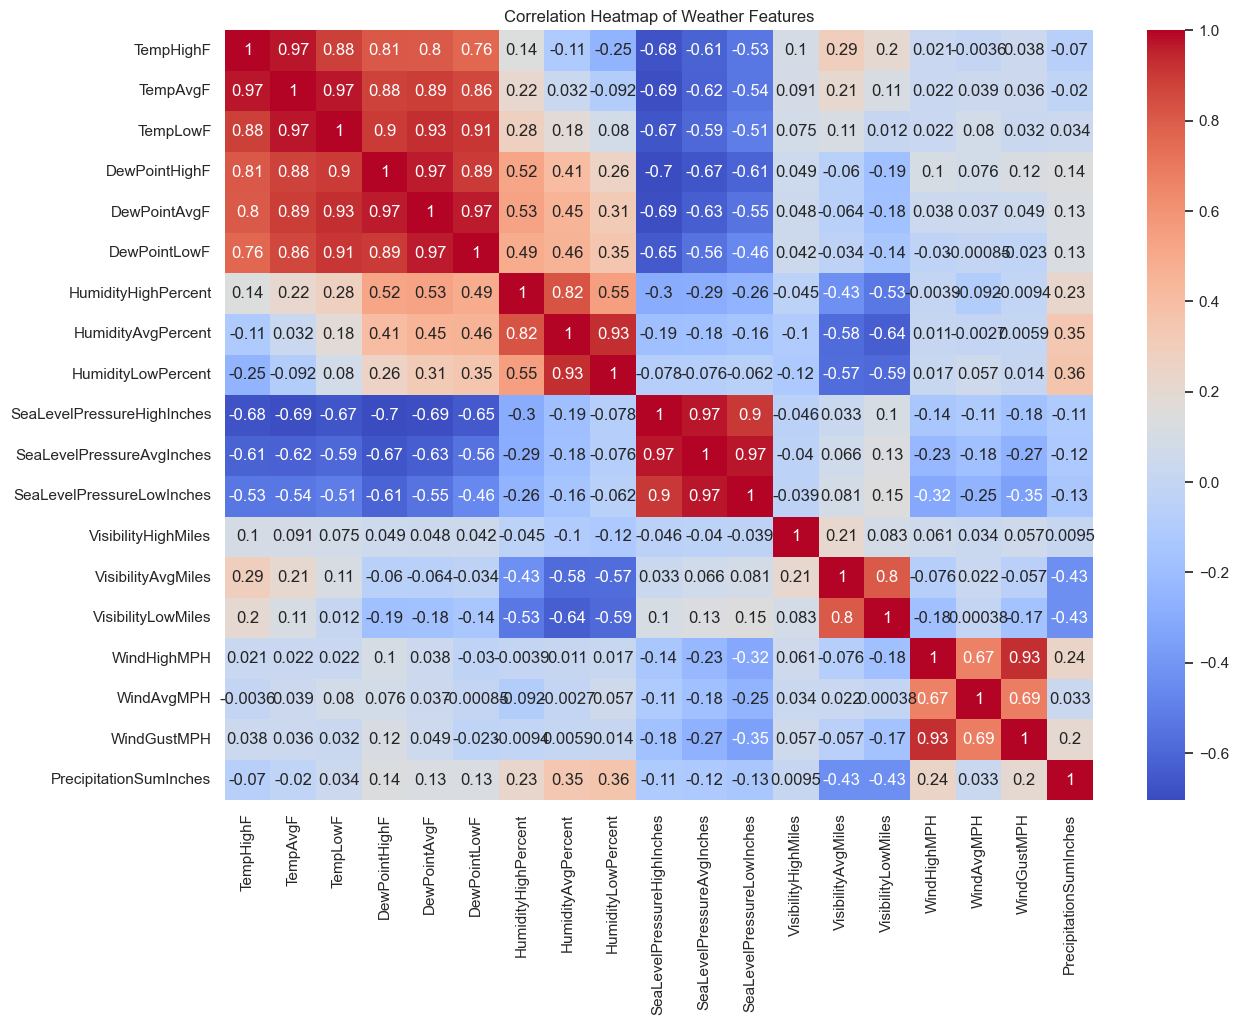

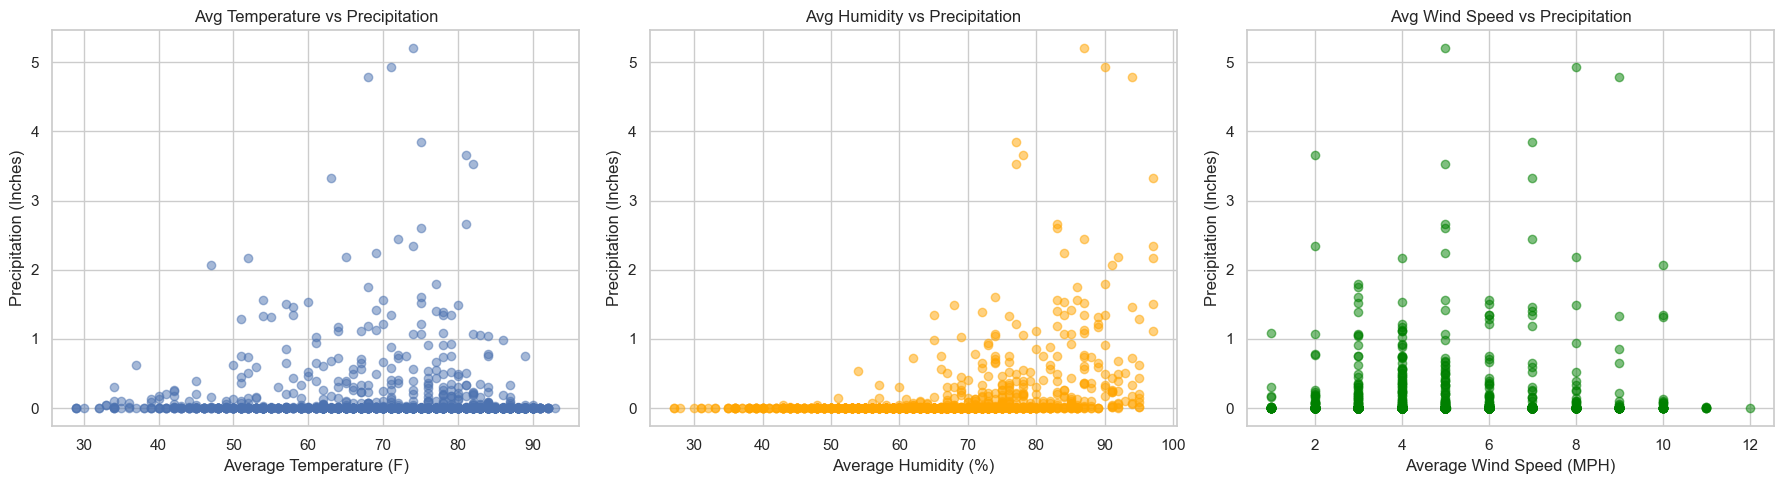

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#set plot style
sns.set(style="whitegrid")
        
data = pd.read_csv("austin_weather.csv")
data.drop(columns=['Date', 'Events'], inplace=True)
data.head()
#check the non numeric value
non_numeric_cols =data.columns[data.dtypes == 'objects']
data[non_numeric_cols].head()
#replace the T and - with o.oo5
data['PrecipitationSumInches'] = data['PrecipitationSumInches'].replace("T", 0.005)
data.replace("-", np.nan, inplace=True)
#convert into float
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
#fill value with mean
data.fillna(data.mean(), inplace=True)

#1.Correlation Heatmap
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Weather Features")
plt.show()

# 2. Scatter plots with Precipitation
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Temperature vs Precipitation
axs[0].scatter(data['TempAvgF'], data['PrecipitationSumInches'], alpha=0.5)
axs[0].set_title('Avg Temperature vs Precipitation')
axs[0].set_xlabel('Average Temperature (F)')
axs[0].set_ylabel('Precipitation (Inches)')

# Humidity vs Precipitation
axs[1].scatter(data['HumidityAvgPercent'], data['PrecipitationSumInches'], alpha=0.5, color='orange')
axs[1].set_title('Avg Humidity vs Precipitation')
axs[1].set_xlabel('Average Humidity (%)')
axs[1].set_ylabel('Precipitation (Inches)')

# Wind Speed vs Precipitation
axs[2].scatter(data['WindAvgMPH'], data['PrecipitationSumInches'], alpha=0.5, color='green')
axs[2].set_title('Avg Wind Speed vs Precipitation')
axs[2].set_xlabel('Average Wind Speed (MPH)')
axs[2].set_ylabel('Precipitation (Inches)')

plt.tight_layout()
plt.show()



R² Score: 0.0706
Mean Absolute Error: 0.1867 inches


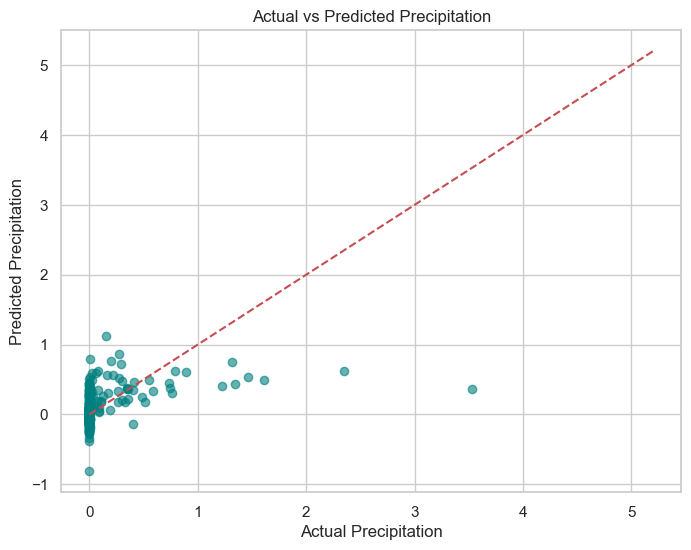

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Define Features and Target
X = data.drop(columns=['PrecipitationSumInches'])
y = data['PrecipitationSumInches']
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
# 4. Predict on Test Data
y_pred = model.predict(X_test)
# 5. Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f} inches")

# 6. Plot: Actual vs Predicted Precipitation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # ideal line
plt.xlabel("Actual Precipitation")
plt.ylabel("Predicted Precipitation")
plt.title("Actual vs Predicted Precipitation")
plt.grid(True)
plt.show()